#**PARTE A**

> **1. Importe o arquivo ”pmc.xlsx” pulando as três primeiras linhas.**

In [ ]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/estag_4i_ps/pmc.xlsx', skiprows=3)

In [ ]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Brasil,Ceará,Pernambuco,Bahia,Minas Gerais,Espírito Santo,Rio de Janeiro,São Paulo,Paraná,Santa Catarina,Rio Grande do Sul,Goiás,Distrito Federal
0,janeiro 2000,Índice de volume de vendas no comércio varejis...,Combustíveis e lubrificantes,79.8,62,61.2,82.1,84.3,144.9,101.3,89.1,70.7,62.5,102.9,101.2,63.2
1,NaN,NaN,"Hipermercados, supermercados, produtos aliment...",54.3,45.8,64.8,61.8,51.8,42.7,64.6,49.4,63.2,57,70.5,51.4,74.6
2,NaN,NaN,"Tecidos, vestuário e calçados",47.2,36.3,36,37.2,49.5,52.2,61.2,49,54.7,35.9,55.5,40,63
3,NaN,NaN,Móveis e eletrodomésticos,24.9,14.8,17.3,16.5,16.5,28.4,35.2,27.8,32.4,33.2,30.3,22.9,29.5
4,NaN,NaN,"Artigos farmacêuticos, médicos, ortopédicos, d...",-,-,-,-,-,-,-,-,-,-,-,-,-


> **2. Renomeie as colunas e as deixe na seguinte ordem: “data”, “var”, “setor” e colunas de localidades. Para essas últimas, utilize siglas (BR e siglas dos estados).**

In [ ]:
cols =('data', 'var', 'setor', 'BR', 'CE', 'PE', 'BA', 'MG', 'ES', 'RJ', 'SP', 'PR', 'SC', 'RS', 'GO', 'DF')

In [ ]:
df = df.set_axis(cols, axis=1)

In [ ]:
df.head()

,data,var,setor,BR,CE,PE,BA,MG,ES,RJ,SP,PR,SC,RS,GO,DF
0,janeiro 2000,Índice de volume de vendas no comércio varejis...,Combustíveis e lubrificantes,79.8,62,61.2,82.1,84.3,144.9,101.3,89.1,70.7,62.5,102.9,101.2,63.2
1,NaN,NaN,"Hipermercados, supermercados, produtos aliment...",54.3,45.8,64.8,61.8,51.8,42.7,64.6,49.4,63.2,57,70.5,51.4,74.6
2,NaN,NaN,"Tecidos, vestuário e calçados",47.2,36.3,36,37.2,49.5,52.2,61.2,49,54.7,35.9,55.5,40,63
3,NaN,NaN,Móveis e eletrodomésticos,24.9,14.8,17.3,16.5,16.5,28.4,35.2,27.8,32.4,33.2,30.3,22.9,29.5
4,NaN,NaN,"Artigos farmacêuticos, médicos, ortopédicos, d...",-,-,-,-,-,-,-,-,-,-,-,-,-


> **3. Converta os valores das colunas de Brasil e UFs para que fiquem na classe numérica.**

In [ ]:
cols = df.columns[3:]
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

In [ ]:
df.dtypes

data      object
var       object
setor     object
BR       float64
CE       float64
PE       float64
BA       float64
MG       float64
ES       float64
RJ       float64
SP       float64
PR       float64
SC       float64
RS       float64
GO       float64
DF       float64
dtype: object

> **4. Substitua os textos na coluna “var”. Faça com que assumam apenas as palavras “volume” ou “receita”, a depender de cada linha.**

In [ ]:
df['var'].replace({'Índice de volume de vendas no comércio varejista (Número-índice)': 'volume',
                   'Índice de receita nominal de vendas no comércio varejista (Número-índice)': 'receita'}, inplace = True)

> **5. Converta a coluna “data” para que ela assuma a classe própria para data. O padrão deve ser YYYY-MM-DD. (Utilize 01 quando não houver especificado o dia).**

In [ ]:
df['data'].replace({'janeiro': 'January', 
                    'fevereiro': 'February',
                    'março': 'March',
                    'abril': 'April',
                    'maio': 'May',
                    'junho': 'June',
                    'julho': 'July',
                    'agosto': 'August',
                    'setembro': 'September',
                    'outubro': 'October',
                    'novembro': 'November',
                    'dezembro': 'December'}, regex = True, inplace = True)

In [ ]:
df.drop(df.tail(1).index, inplace=True)

In [ ]:
df['data'] = pd.to_datetime(df['data'], format='%B %Y')

In [ ]:
df

,data,var,setor,BR,CE,PE,BA,MG,ES,RJ,SP,PR,SC,RS,GO,DF
0,2000-01-01,volume,Combustíveis e lubrificantes,79.8,62.0,61.2,82.1,84.3,144.9,101.3,89.1,70.7,62.5,102.9,101.2,63.2
1,NaT,NaN,"Hipermercados, supermercados, produtos aliment...",54.3,45.8,64.8,61.8,51.8,42.7,64.6,49.4,63.2,57.0,70.5,51.4,74.6
2,NaT,NaN,"Tecidos, vestuário e calçados",47.2,36.3,36.0,37.2,49.5,52.2,61.2,49.0,54.7,35.9,55.5,40.0,63.0
3,NaT,NaN,Móveis e eletrodomésticos,24.9,14.8,17.3,16.5,16.5,28.4,35.2,27.8,32.4,33.2,30.3,22.9,29.5
4,NaT,NaN,"Artigos farmacêuticos, médicos, ortopédicos, d...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4203,NaT,NaN,Móveis e eletrodomésticos,125.4,83.5,89.3,127.6,82.3,151.6,174.9,127.7,100.0,159.9,134.0,108.8,110.8
4204,NaT,NaN,"Artigos farmacêuticos, médicos, ortopédicos, d...",198.6,194.8,231.0,181.0,262.1,242.0,166.6,191.8,236.1,237.4,191.5,205.5,168.3
4205,NaT,NaN,"Livros, jornais, revistas e papelaria",41.9,24.3,25.6,30.8,60.1,34.2,54.4,35.1,60.7,74.1,41.5,33.4,23.4
4206,NaT,NaN,"Equipamentos e materiais para escritório, info...",82.1,86.0,111.8,56.1,97.7,356.2,86.0,59.4,89.9,113.5,74.0,77.5,36.4


> **6. Para as colunas “data” e “var”, preencha os espaços contendo “NA” com a informação que não seja ”NA” localizada imediatamente acima.**


In [ ]:
df['data'].fillna(method='ffill', inplace = True)
df['var'].fillna(method='ffill', inplace = True)

In [ ]:
df

,data,var,setor,BR,CE,PE,BA,MG,ES,RJ,SP,PR,SC,RS,GO,DF
0,2000-01-01,volume,Combustíveis e lubrificantes,79.8,62.0,61.2,82.1,84.3,144.9,101.3,89.1,70.7,62.5,102.9,101.2,63.2
1,2000-01-01,volume,"Hipermercados, supermercados, produtos aliment...",54.3,45.8,64.8,61.8,51.8,42.7,64.6,49.4,63.2,57.0,70.5,51.4,74.6
2,2000-01-01,volume,"Tecidos, vestuário e calçados",47.2,36.3,36.0,37.2,49.5,52.2,61.2,49.0,54.7,35.9,55.5,40.0,63.0
3,2000-01-01,volume,Móveis e eletrodomésticos,24.9,14.8,17.3,16.5,16.5,28.4,35.2,27.8,32.4,33.2,30.3,22.9,29.5
4,2000-01-01,volume,"Artigos farmacêuticos, médicos, ortopédicos, d...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4203,2021-11-01,receita,Móveis e eletrodomésticos,125.4,83.5,89.3,127.6,82.3,151.6,174.9,127.7,100.0,159.9,134.0,108.8,110.8
4204,2021-11-01,receita,"Artigos farmacêuticos, médicos, ortopédicos, d...",198.6,194.8,231.0,181.0,262.1,242.0,166.6,191.8,236.1,237.4,191.5,205.5,168.3
4205,2021-11-01,receita,"Livros, jornais, revistas e papelaria",41.9,24.3,25.6,30.8,60.1,34.2,54.4,35.1,60.7,74.1,41.5,33.4,23.4
4206,2021-11-01,receita,"Equipamentos e materiais para escritório, info...",82.1,86.0,111.8,56.1,97.7,356.2,86.0,59.4,89.9,113.5,74.0,77.5,36.4


> **7. Exclua todas as linhas em que a coluna “var” seja igual à “receita”.**

In [ ]:
df.drop(df[df['var'] == 'receita'].index, inplace = True)

In [ ]:
df

,data,var,setor,BR,CE,PE,BA,MG,ES,RJ,SP,PR,SC,RS,GO,DF
0,2000-01-01,volume,Combustíveis e lubrificantes,79.8,62.0,61.2,82.1,84.3,144.9,101.3,89.1,70.7,62.5,102.9,101.2,63.2
1,2000-01-01,volume,"Hipermercados, supermercados, produtos aliment...",54.3,45.8,64.8,61.8,51.8,42.7,64.6,49.4,63.2,57.0,70.5,51.4,74.6
2,2000-01-01,volume,"Tecidos, vestuário e calçados",47.2,36.3,36.0,37.2,49.5,52.2,61.2,49.0,54.7,35.9,55.5,40.0,63.0
3,2000-01-01,volume,Móveis e eletrodomésticos,24.9,14.8,17.3,16.5,16.5,28.4,35.2,27.8,32.4,33.2,30.3,22.9,29.5
4,2000-01-01,volume,"Artigos farmacêuticos, médicos, ortopédicos, d...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4195,2021-11-01,volume,Móveis e eletrodomésticos,98.0,66.5,67.2,101.2,59.9,125.0,136.3,97.7,80.0,125.9,98.9,88.6,93.4
4196,2021-11-01,volume,"Artigos farmacêuticos, médicos, ortopédicos, d...",143.6,127.4,163.3,119.1,191.5,182.1,124.5,142.2,158.3,158.1,145.1,146.3,130.5
4197,2021-11-01,volume,"Livros, jornais, revistas e papelaria",27.9,16.1,17.3,22.2,41.4,23.9,38.0,22.0,39.2,47.9,28.1,22.6,16.9
4198,2021-11-01,volume,"Equipamentos e materiais para escritório, info...",80.5,85.2,96.4,58.0,74.9,338.5,89.3,58.5,91.7,134.0,69.0,62.8,37.7


#**PARTE B**

> **1. Utilize visualizações e estatísticas para comparar o setor de Móveis e Eletrodomésticos com os outros setores. Como a sede da empresa é em São Paulo, verifique o comportamento neste estado. (Dê maior destaque para o período da pandemia).**

In [ ]:
df.head()

,data,var,setor,BR,CE,PE,BA,MG,ES,RJ,SP,PR,SC,RS,GO,DF
0,2000-01-01,volume,Combustíveis e lubrificantes,79.8,62.0,61.2,82.1,84.3,144.9,101.3,89.1,70.7,62.5,102.9,101.2,63.2
1,2000-01-01,volume,"Hipermercados, supermercados, produtos aliment...",54.3,45.8,64.8,61.8,51.8,42.7,64.6,49.4,63.2,57.0,70.5,51.4,74.6
2,2000-01-01,volume,"Tecidos, vestuário e calçados",47.2,36.3,36.0,37.2,49.5,52.2,61.2,49.0,54.7,35.9,55.5,40.0,63.0
3,2000-01-01,volume,Móveis e eletrodomésticos,24.9,14.8,17.3,16.5,16.5,28.4,35.2,27.8,32.4,33.2,30.3,22.9,29.5
4,2000-01-01,volume,"Artigos farmacêuticos, médicos, ortopédicos, d...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


>> **Filtrando o DF original**

In [ ]:
df1 = df[df['data'] >= '2020-01-01']

>> **Criando uma pivot table**

In [ ]:
df2 = df1.pivot(index = 'data', columns = 'setor', values= 'SP')

>> **Transformando a pivot table em um DataFrame de formato regular**


In [ ]:
df2.columns.name = None                #remove categories
df2 = df2.reset_index()                #index to columns 

In [ ]:
df2.head()

,data,"Artigos farmacêuticos, médicos, ortopédicos, de perfumaria e cosméticos",Combustíveis e lubrificantes,"Equipamentos e materiais para escritório, informática e comunicação","Hipermercados, supermercados, produtos alimentícios, bebidas e fumo","Livros, jornais, revistas e papelaria",Móveis e eletrodomésticos,Outros artigos de uso pessoal e doméstico,"Tecidos, vestuário e calçados"
0,2020-01-01,137.0,79.8,63.1,96.2,76.0,107.3,101.6,66.6
1,2020-02-01,132.1,75.0,57.7,96.6,48.2,94.0,85.6,62.0
2,2020-03-01,148.2,75.0,49.9,110.6,25.5,81.2,78.3,38.4
3,2020-04-01,104.6,64.5,38.1,100.0,14.2,46.9,64.9,10.9
4,2020-05-01,127.2,62.4,42.6,104.9,10.0,65.4,89.5,22.8


>> **Criando uma lista com o nome das  colunas**

In [ ]:
colunas = df2.columns

>> **Criando a visualização com a evolução das séries**

In [ ]:
import plotly.graph_objs as go
import plotly.offline as py

farm = go.Scatter(
                x = df2[colunas[0]],
                y = df2[colunas[1]],
                name = colunas[1],
                line = dict(color= '#330000'),
                opacity = 0.8)

comb = go.Scatter(
                x = df2[colunas[0]],
                y = df2[colunas[2]],
                name = colunas[2],
                line = dict(color= '#B2FF66'),
                opacity = 0.8)

equip = go.Scatter(
                x = df2[colunas[0]],
                y = df2[colunas[3]],
                name = colunas[3],
                line = dict(color= '#FF00FF'),
                opacity = 0.8)

hiper = go.Scatter(
                x = df2[colunas[0]],
                y = df2[colunas[4]],
                name = colunas[4],
                line = dict(color= '#ff7f0e'),
                opacity = 0.8)

livros = go.Scatter(
                x = df2[colunas[0]],
                y = df2[colunas[5]],
                name = colunas[5],
                line = dict(color= '#d62728'),
                opacity = 0.8)

moveis = go.Scatter(
                x = df2[colunas[0]],
                y = df2[colunas[6]],
                name = colunas[6],
                line = dict(color= '#9467bd'),
                opacity = 0.8)

outros = go.Scatter(
                x = df2[colunas[0]],
                y = df2[colunas[7]],
                name = colunas[7],
                line = dict(color= '#e377c2'),
                opacity = 0.8)

tecidos = go.Scatter(
                x = df2[colunas[0]],
                y = df2[colunas[8]],
                name = colunas[8],
                line = dict(color= '#17becf'),
                opacity = 0.8)

layout = go.Layout(
    title = 'Pesquisa Mensal de Comércio (PMC)',
    title_x = 0.5,
    xaxis = dict(
        rangeslider = dict(
            visible = True
        )
    )
)

data = [farm, comb, equip, hiper, livros, moveis, outros, tecidos]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

> Duplo clique nas legendas para isolar ou apresentar uma série separadamente;

> Desloque a barra inferior para verificar um período específico;

> Clique em 'Reset Axes' no canto superior direito para voltar a posição inicial.


**2. Compare visualmente o efeito da pandemia neste setor entre os estados. Observe diferenças na intensidade e no tempo para recuperação.**



In [ ]:
df3 = df[df['setor'] == 'Móveis e eletrodomésticos']

In [ ]:
df3

,data,var,setor,BR,CE,PE,BA,MG,ES,RJ,SP,PR,SC,RS,GO,DF
3,2000-01-01,volume,Móveis e eletrodomésticos,24.9,14.8,17.3,16.5,16.5,28.4,35.2,27.8,32.4,33.2,30.3,22.9,29.5
19,2000-02-01,volume,Móveis e eletrodomésticos,24.0,13.9,15.0,16.3,16.2,28.1,32.3,27.6,31.0,32.7,29.6,20.3,26.6
35,2000-03-01,volume,Móveis e eletrodomésticos,25.4,12.6,14.9,16.3,16.6,29.9,33.5,29.9,34.7,34.8,32.6,22.2,28.2
51,2000-04-01,volume,Móveis e eletrodomésticos,24.3,14.1,14.4,15.0,15.5,27.2,34.1,28.7,28.6,32.1,30.1,21.6,26.7
67,2000-05-01,volume,Móveis e eletrodomésticos,29.4,19.0,17.5,19.1,18.9,31.1,42.4,33.4,33.7,39.4,35.7,26.2,32.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4131,2021-07-01,volume,Móveis e eletrodomésticos,89.1,67.0,67.0,100.3,58.4,99.3,106.4,91.3,80.8,104.4,93.4,81.3,90.8
4147,2021-08-01,volume,Móveis e eletrodomésticos,85.0,63.9,64.3,97.5,50.5,102.5,103.9,90.1,78.2,102.9,83.5,77.8,82.9
4163,2021-09-01,volume,Móveis e eletrodomésticos,80.7,57.1,61.8,93.3,51.6,108.9,98.3,84.4,70.8,85.8,76.4,78.3,78.4
4179,2021-10-01,volume,Móveis e eletrodomésticos,78.9,52.5,54.0,82.5,49.2,91.9,87.8,87.2,67.0,83.7,80.8,81.5,82.2


In [ ]:
colunas = df3.columns
colunas

Index(['data', 'var', 'setor', 'BR', 'CE', 'PE', 'BA', 'MG', 'ES', 'RJ', 'SP',
       'PR', 'SC', 'RS', 'GO', 'DF'],
      dtype='object')

In [ ]:
df.head()

,data,var,setor,BR,CE,PE,BA,MG,ES,RJ,SP,PR,SC,RS,GO,DF
0,2000-01-01,volume,Combustíveis e lubrificantes,79.8,62.0,61.2,82.1,84.3,144.9,101.3,89.1,70.7,62.5,102.9,101.2,63.2
1,2000-01-01,volume,"Hipermercados, supermercados, produtos aliment...",54.3,45.8,64.8,61.8,51.8,42.7,64.6,49.4,63.2,57.0,70.5,51.4,74.6
2,2000-01-01,volume,"Tecidos, vestuário e calçados",47.2,36.3,36.0,37.2,49.5,52.2,61.2,49.0,54.7,35.9,55.5,40.0,63.0
3,2000-01-01,volume,Móveis e eletrodomésticos,24.9,14.8,17.3,16.5,16.5,28.4,35.2,27.8,32.4,33.2,30.3,22.9,29.5
4,2000-01-01,volume,"Artigos farmacêuticos, médicos, ortopédicos, d...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


>> **Definindo uma função para facilitar os próximos passos**

In [ ]:
def plot_lines(dataframe):
  colunas2 = df.columns
  BR = go.Scatter(
                  x = dataframe[colunas2[0]],
                  y = dataframe[colunas2[3]],
                  name = colunas2[3],
                  line = dict(color= '#330000'),
                  opacity = 0.8)

  CE = go.Scatter(
                  x = dataframe[colunas2[0]],
                  y = dataframe[colunas2[4]],
                  name = colunas2[4],
                  line = dict(color= '#B2FF66'),
                  opacity = 0.8)

  PE = go.Scatter(
                  x = dataframe[colunas2[0]],
                  y = dataframe[colunas2[5]],
                  name = colunas2[5],
                  line = dict(color= '#FF00FF'),
                  opacity = 0.8)

  BA = go.Scatter(
                  x = dataframe[colunas2[0]],
                  y = dataframe[colunas2[6]],
                  name = colunas2[6],
                  line = dict(color= '#ff7f0e'),
                  opacity = 0.8)

  MG = go.Scatter(
                  x = dataframe[colunas2[0]],
                  y = dataframe[colunas2[7]],
                  name = colunas2[7],
                  line = dict(color= '#d62728'),
                  opacity = 0.8)

  ES = go.Scatter(
                  x = dataframe[colunas2[0]],
                  y = dataframe[colunas2[8]],
                  name = colunas2[8],
                  line = dict(color= '#9467bd'),
                  opacity = 0.8)

  RJ = go.Scatter(
                  x = dataframe[colunas2[0]],
                  y = dataframe[colunas2[9]],
                  name = colunas2[9],
                  line = dict(color= '#e377c2'),
                  opacity = 0.8)

  SP = go.Scatter(
                  x = dataframe[colunas2[0]],
                  y = dataframe[colunas2[10]],
                  name = colunas2[10],
                  line = dict(color= '#17becf'),
                  opacity = 0.8)

  PR = go.Scatter(
                  x = dataframe[colunas2[0]],
                  y = dataframe[colunas2[11]],
                  name = colunas2[11],
                  line = dict(color= '#1f77b4'),
                  opacity = 0.8)

  SC = go.Scatter(
                  x = dataframe[colunas2[0]],
                  y = dataframe[colunas2[12]],
                  name = colunas2[12],
                  line = dict(color= '#7f7f7f'),
                  opacity = 0.8)

  RS = go.Scatter(
                  x = dataframe[colunas2[0]],
                  y = dataframe[colunas2[13]],
                  name = colunas2[13],
                  line = dict(color= '#2ca02c'),
                  opacity = 0.8)

  GO = go.Scatter(
                  x = dataframe[colunas2[0]],
                  y = dataframe[colunas2[14]],
                  name = colunas2[14],
                  line = dict(color= '#bcbd22'),
                  opacity = 0.8)

  DF = go.Scatter(
                  x = dataframe[colunas2[0]],
                  y = dataframe[colunas2[15]],
                  name = colunas2[15],
                  line = dict(color= '#8c564b'),
                  opacity = 0.8)

  layout = go.Layout(
      title = 'Setor de Móveis e eletrodomésticos',
      title_x = 0.5,
      xaxis = dict(
          rangeslider = dict(
              visible = True
          )
      )
  )

  data = [BR, CE, PE, BA, MG, ES, RJ, SP, PR, SC, RS, GO, DF]
  fig = go.Figure(data = data, layout = layout)
  return py.iplot(fig)

>> **Plotando a evolução do setor por Estado**

In [ ]:
plot_lines(df3)

> Graficamente o Ceará foi um dos Estados que mais sofreu com os efeitos da pandemia no setor de móveis e eletrodomésticos. Seu volume de 66.5 em novembro de 2021, ainda não havia superado os 82.5 de novembro de 2019. Em abril de 2020 o indicador atingiu um vale de 10.9

**3. Calcule a variação percentual na fase inicial da pandemia, entre abril de 2019 e abril de 2020, para todos os estados, dentro do setor de interesse. Mostre graficamente as diferenças.**

In [ ]:
df3.head()

,data,var,setor,BR,CE,PE,BA,MG,ES,RJ,SP,PR,SC,RS,GO,DF
3,2000-01-01,volume,Móveis e eletrodomésticos,24.9,14.8,17.3,16.5,16.5,28.4,35.2,27.8,32.4,33.2,30.3,22.9,29.5
19,2000-02-01,volume,Móveis e eletrodomésticos,24.0,13.9,15.0,16.3,16.2,28.1,32.3,27.6,31.0,32.7,29.6,20.3,26.6
35,2000-03-01,volume,Móveis e eletrodomésticos,25.4,12.6,14.9,16.3,16.6,29.9,33.5,29.9,34.7,34.8,32.6,22.2,28.2
51,2000-04-01,volume,Móveis e eletrodomésticos,24.3,14.1,14.4,15.0,15.5,27.2,34.1,28.7,28.6,32.1,30.1,21.6,26.7
67,2000-05-01,volume,Móveis e eletrodomésticos,29.4,19.0,17.5,19.1,18.9,31.1,42.4,33.4,33.7,39.4,35.7,26.2,32.6


In [ ]:
df4 = df3.copy()

In [ ]:
df4.loc[:,'BR':] = df4.loc[:,'BR':].pct_change()*100

In [ ]:
df4.head()

,data,var,setor,BR,CE,PE,BA,MG,ES,RJ,SP,PR,SC,RS,GO,DF
3,2000-01-01,volume,Móveis e eletrodomésticos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,2000-02-01,volume,Móveis e eletrodomésticos,-3.614458,-6.081081,-13.294798,-1.212121,-1.818182,-1.056338,-8.238636,-0.719424,-4.320988,-1.506024,-2.310231,-11.353712,-9.830508
35,2000-03-01,volume,Móveis e eletrodomésticos,5.833333,-9.352518,-0.666667,0.000000,2.469136,6.405694,3.715170,8.333333,11.935484,6.422018,10.135135,9.359606,6.015038
51,2000-04-01,volume,Móveis e eletrodomésticos,-4.330709,11.904762,-3.355705,-7.975460,-6.626506,-9.030100,1.791045,-4.013378,-17.579251,-7.758621,-7.668712,-2.702703,-5.319149
67,2000-05-01,volume,Móveis e eletrodomésticos,20.987654,34.751773,21.527778,27.333333,21.935484,14.338235,24.340176,16.376307,17.832168,22.741433,18.604651,21.296296,22.097378


In [ ]:
mask = (df4['data'] > '2019-03-01') & (df4['data'] <= '2020-04-01')

In [ ]:
df5 = df4.loc[mask]

In [ ]:
plot_lines(df5)

> Podemos observar uma variação percentual negativa para o setor em todos os estados a partir de dezembro de 2019. Embora se observe algumas variações negativas em abril de 2019, podendo ser reflexo do efeito sazonal, alguns estados ainda apresentam variação positiva. Em abril de 2019 no entanto todos os estados apresentam variação negativa.

#**PARTE C**

> **1. Importe a base “rendimento_efetivo_real.csv”.**

In [ ]:
dfrer = pd.read_csv('/content/drive/MyDrive/estag_4i_ps/rendimento_efetivo_real.csv', sep=';')

In [ ]:
dfrer.head()

,Data,"Rendimento real médio de todos os trabalhos efetivos mensais - R$ Penúltimo mês da série - Instituto Brasileiro de Geografia e Estatística, Pesquisa Nacional por Amostra de Domicílios Contínua (IBGE/PNAD Contínua) - PNADC12_RRTE12",Unnamed: 2
0,2012.03,2606,NaN
1,2012.04,2457,NaN
2,2012.05,2453,NaN
3,2012.06,2459,NaN
4,2012.07,2470,NaN


In [ ]:
dfrer['Data']= dfrer['Data'].astype(str)

In [ ]:
dfrer['Data'].unique()

array(['2012.03', '2012.04', '2012.05', '2012.06', '2012.07', '2012.08',
       '2012.09', '2012.1', '2012.11', '2012.12', '2013.01', '2013.02',
       '2013.03', '2013.04', '2013.05', '2013.06', '2013.07', '2013.08',
       '2013.09', '2013.1', '2013.11', '2013.12', '2014.01', '2014.02',
       '2014.03', '2014.04', '2014.05', '2014.06', '2014.07', '2014.08',
       '2014.09', '2014.1', '2014.11', '2014.12', '2015.01', '2015.02',
       '2015.03', '2015.04', '2015.05', '2015.06', '2015.07', '2015.08',
       '2015.09', '2015.1', '2015.11', '2015.12', '2016.01', '2016.02',
       '2016.03', '2016.04', '2016.05', '2016.06', '2016.07', '2016.08',
       '2016.09', '2016.1', '2016.11', '2016.12', '2017.01', '2017.02',
       '2017.03', '2017.04', '2017.05', '2017.06', '2017.07', '2017.08',
       '2017.09', '2017.1', '2017.11', '2017.12', '2018.01', '2018.02',
       '2018.03', '2018.04', '2018.05', '2018.06', '2018.07', '2018.08',
       '2018.09', '2018.1', '2018.11', '2018.12', '2019.0

> Havia um erro na base que estava considerando todo o mês 10 como 1, ou seja, o zero a direita não estava sendo reconhecido, o que nos entregava uma data YYYY-01-01 ao invés de YYYY-10-01. O problema é corrigido com a substituição a seguir.

In [ ]:
dfrer['Data'].replace({'2012.1' : '2012.10',
                       '2013.1' : '2013.10',
                       '2014.1' : '2014.10',
                       '2015.1' : '2015.10',
                       '2016.1' : '2016.10',
                       '2017.1' : '2017.10',
                       '2018.1' : '2018.10',
                       '2019.1' : '2019.10',
                       '2020.1' : '2020.10',
                       '2021.1' : '2021.10'}, inplace = True)

In [ ]:
dfrer

,Data,"Rendimento real médio de todos os trabalhos efetivos mensais - R$ Penúltimo mês da série - Instituto Brasileiro de Geografia e Estatística, Pesquisa Nacional por Amostra de Domicílios Contínua (IBGE/PNAD Contínua) - PNADC12_RRTE12",Unnamed: 2
0,2012.03,2606,NaN
1,2012.04,2457,NaN
2,2012.05,2453,NaN
3,2012.06,2459,NaN
4,2012.07,2470,NaN
...,...,...,...
111,2021.06,2588,NaN
112,2021.07,2572,NaN
113,2021.08,2545,NaN
114,2021.09,2498,NaN


> **2. Renomeie as colunas para que tenhamos ”data” e ”renda”.**


In [ ]:
dfrer.describe()

,"Rendimento real médio de todos os trabalhos efetivos mensais - R$ Penúltimo mês da série - Instituto Brasileiro de Geografia e Estatística, Pesquisa Nacional por Amostra de Domicílios Contínua (IBGE/PNAD Contínua) - PNADC12_RRTE12",Unnamed: 2
count,116.000000,0.0
mean,2630.250000,NaN
std,128.441215,NaN
min,2453.000000,NaN
25%,2551.750000,NaN
50%,2599.000000,NaN
75%,2659.250000,NaN
max,2987.000000,NaN


In [ ]:
dfrer.drop('Unnamed: 2', axis=1, inplace = True)

In [ ]:
cols1 = ('data', 'renda')

In [ ]:
dfrer = dfrer.set_axis(cols1, axis=1)

In [ ]:
dfrer.head()

,data,renda
0,2012.03,2606
1,2012.04,2457
2,2012.05,2453
3,2012.06,2459
4,2012.07,2470


> **3. Ajuste a coluna data para o formato YYYY-MM-DD. (Utilize 01 quando não houver especificado o dia).**


In [ ]:
dfrer.dtypes

data     object
renda     int64
dtype: object

In [ ]:
dfrer['data'] = dfrer['data'].apply(lambda x: x.replace('.',' '))

In [ ]:
dfrer['data'] = pd.to_datetime(dfrer['data'], format='%Y %m')

In [ ]:
dfrer.head()

,data,renda
0,2012-03-01,2606
1,2012-04-01,2457
2,2012-05-01,2453
3,2012-06-01,2459
4,2012-07-01,2470


> **4. Junte com a base anterior já organizada.**

In [ ]:
dfrer['data'].unique()

array(['2012-03-01T00:00:00.000000000', '2012-04-01T00:00:00.000000000',
       '2012-05-01T00:00:00.000000000', '2012-06-01T00:00:00.000000000',
       '2012-07-01T00:00:00.000000000', '2012-08-01T00:00:00.000000000',
       '2012-09-01T00:00:00.000000000', '2012-10-01T00:00:00.000000000',
       '2012-11-01T00:00:00.000000000', '2012-12-01T00:00:00.000000000',
       '2013-01-01T00:00:00.000000000', '2013-02-01T00:00:00.000000000',
       '2013-03-01T00:00:00.000000000', '2013-04-01T00:00:00.000000000',
       '2013-05-01T00:00:00.000000000', '2013-06-01T00:00:00.000000000',
       '2013-07-01T00:00:00.000000000', '2013-08-01T00:00:00.000000000',
       '2013-09-01T00:00:00.000000000', '2013-10-01T00:00:00.000000000',
       '2013-11-01T00:00:00.000000000', '2013-12-01T00:00:00.000000000',
       '2014-01-01T00:00:00.000000000', '2014-02-01T00:00:00.000000000',
       '2014-03-01T00:00:00.000000000', '2014-04-01T00:00:00.000000000',
       '2014-05-01T00:00:00.000000000', '2014-06-01

In [ ]:
df3.shape

(263, 16)

In [ ]:
df_final = pd.merge(df3, dfrer, how='outer', on='data')

In [ ]:
df_final.shape

(263, 17)

In [ ]:
df_final.head()

,data,var,setor,BR,CE,PE,BA,MG,ES,RJ,SP,PR,SC,RS,GO,DF,renda
0,2000-01-01,volume,Móveis e eletrodomésticos,24.9,14.8,17.3,16.5,16.5,28.4,35.2,27.8,32.4,33.2,30.3,22.9,29.5,NaN
1,2000-02-01,volume,Móveis e eletrodomésticos,24.0,13.9,15.0,16.3,16.2,28.1,32.3,27.6,31.0,32.7,29.6,20.3,26.6,NaN
2,2000-03-01,volume,Móveis e eletrodomésticos,25.4,12.6,14.9,16.3,16.6,29.9,33.5,29.9,34.7,34.8,32.6,22.2,28.2,NaN
3,2000-04-01,volume,Móveis e eletrodomésticos,24.3,14.1,14.4,15.0,15.5,27.2,34.1,28.7,28.6,32.1,30.1,21.6,26.7,NaN
4,2000-05-01,volume,Móveis e eletrodomésticos,29.4,19.0,17.5,19.1,18.9,31.1,42.4,33.4,33.7,39.4,35.7,26.2,32.6,NaN


> **5. Gere uma visualização com as duas variáveis de interesse (note que é apenas para Brasil).**


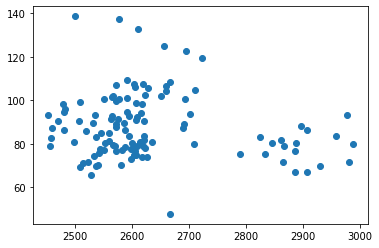

In [ ]:
from matplotlib import pyplot

x, y = df_final['renda'], df_final['BR']
pyplot.scatter(x, y)
pyplot.show()

> **Normalizando os dados para comparar a evolução das duas séries**

In [ ]:
date = pd.DataFrame(df_final['data'])

In [ ]:
normal_BR = pd.DataFrame((df_final['BR'] - df_final['BR'].min())/(df_final['BR'].max()-df_final['BR'].min()))


In [ ]:
normal_renda = pd.DataFrame((df_final['renda'] - df_final['renda'].min())/(df_final['renda'].max()-df_final['renda'].min()))

In [ ]:
df_norm = pd.concat([date, normal_BR, normal_renda], axis = 1)

In [ ]:
colunas3 = df_norm.columns

In [ ]:
colunas3

Index(['data', 'BR', 'renda'], dtype='object')

In [ ]:
BR = go.Scatter(
                x = df_norm[colunas3[0]],
                y = df_norm[colunas3[1]],
                name = colunas3[1],
                line = dict(color= '#330000'),
                opacity = 0.8)

renda = go.Scatter(
                x = df_norm[colunas3[0]],
                y = df_norm[colunas3[2]],
                name = colunas3[2],
                line = dict(color= '#B2FF66'),
                opacity = 0.8)

layout = go.Layout(
    title = 'Evolução do comércio e do rendimento real médio mensal',
    title_x = 0.5,
    xaxis = dict(
        rangeslider = dict(
            visible = True
        )
    )
)

data = [BR, renda]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

> **6. Crie um modelo estatístico que estime a relação entre volume de vendas de móveis e eletrodomésticos com o rendimento real médio efetivo.**

> **Aplicando visualização e Minimos Quadrados ordinários**

In [ ]:
y = df_final

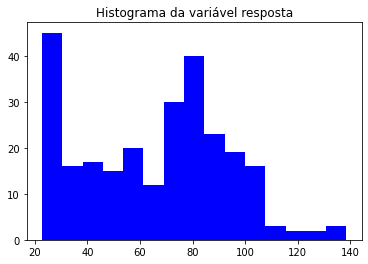

In [ ]:
pyplot.hist(df_final['BR'], color='blue', bins=15)
pyplot.title('Histograma da variável resposta')
pyplot.show()

In [ ]:
import statsmodels.formula.api as sm
reg = sm.ols(formula='BR~renda', data=df_final).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                     BR   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     2.850
Date:                Mon, 31 Jan 2022   Prob (F-statistic):             0.0941
Time:                        01:30:32   Log-Likelihood:                -477.69
No. Observations:                 116   AIC:                             959.4
Df Residuals:                     114   BIC:                             964.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    136.3796     28.670      4.757      0.0

In [ ]:
df_final['month'] = df_final['data'].dt.month

In [ ]:
df_final

,data,var,setor,BR,CE,PE,BA,MG,ES,RJ,SP,PR,SC,RS,GO,DF,renda,month
0,2000-01-01,volume,Móveis e eletrodomésticos,24.9,14.8,17.3,16.5,16.5,28.4,35.2,27.8,32.4,33.2,30.3,22.9,29.5,NaN,1
1,2000-02-01,volume,Móveis e eletrodomésticos,24.0,13.9,15.0,16.3,16.2,28.1,32.3,27.6,31.0,32.7,29.6,20.3,26.6,NaN,2
2,2000-03-01,volume,Móveis e eletrodomésticos,25.4,12.6,14.9,16.3,16.6,29.9,33.5,29.9,34.7,34.8,32.6,22.2,28.2,NaN,3
3,2000-04-01,volume,Móveis e eletrodomésticos,24.3,14.1,14.4,15.0,15.5,27.2,34.1,28.7,28.6,32.1,30.1,21.6,26.7,NaN,4
4,2000-05-01,volume,Móveis e eletrodomésticos,29.4,19.0,17.5,19.1,18.9,31.1,42.4,33.4,33.7,39.4,35.7,26.2,32.6,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,2021-07-01,volume,Móveis e eletrodomésticos,89.1,67.0,67.0,100.3,58.4,99.3,106.4,91.3,80.8,104.4,93.4,81.3,90.8,2572.0,7
259,2021-08-01,volume,Móveis e eletrodomésticos,85.0,63.9,64.3,97.5,50.5,102.5,103.9,90.1,78.2,102.9,83.5,77.8,82.9,2545.0,8
260,2021-09-01,volume,Móveis e eletrodomésticos,80.7,57.1,61.8,93.3,51.6,108.9,98.3,84.4,70.8,85.8,76.4,78.3,78.4,2498.0,9
261,2021-10-01,volume,Móveis e eletrodomésticos,78.9,52.5,54.0,82.5,49.2,91.9,87.8,87.2,67.0,83.7,80.8,81.5,82.2,2456.0,10


In [ ]:
df_final['d12'] = df_final['month'] == 12

In [ ]:
df_final['d12'] = df_final['d12'].astype(int)

In [ ]:
df_final.head(12)

,data,var,setor,BR,CE,PE,BA,MG,ES,RJ,SP,PR,SC,RS,GO,DF,renda,month,d12
0,2000-01-01,volume,Móveis e eletrodomésticos,24.9,14.8,17.3,16.5,16.5,28.4,35.2,27.8,32.4,33.2,30.3,22.9,29.5,NaN,1,0
1,2000-02-01,volume,Móveis e eletrodomésticos,24.0,13.9,15.0,16.3,16.2,28.1,32.3,27.6,31.0,32.7,29.6,20.3,26.6,NaN,2,0
2,2000-03-01,volume,Móveis e eletrodomésticos,25.4,12.6,14.9,16.3,16.6,29.9,33.5,29.9,34.7,34.8,32.6,22.2,28.2,NaN,3,0
3,2000-04-01,volume,Móveis e eletrodomésticos,24.3,14.1,14.4,15.0,15.5,27.2,34.1,28.7,28.6,32.1,30.1,21.6,26.7,NaN,4,0
4,2000-05-01,volume,Móveis e eletrodomésticos,29.4,19.0,17.5,19.1,18.9,31.1,42.4,33.4,33.7,39.4,35.7,26.2,32.6,NaN,5,0
5,2000-06-01,volume,Móveis e eletrodomésticos,25.7,15.8,16.2,17.9,16.5,28.6,34.5,29.1,31.2,34.9,33.1,24.8,28.7,NaN,6,0
6,2000-07-01,volume,Móveis e eletrodomésticos,28.4,18.1,18.2,18.3,18.2,29.8,40.4,31.7,33.6,36.8,35.3,25.7,32.5,NaN,7,0
7,2000-08-01,volume,Móveis e eletrodomésticos,29.3,18.8,18.4,18.9,18.1,30.1,41.0,33.9,34.6,37.8,34.4,29.8,30.9,NaN,8,0
8,2000-09-01,volume,Móveis e eletrodomésticos,27.2,14.7,16.9,17.4,17.6,26.5,36.7,32.5,31.9,34.6,30.2,26.2,32.5,NaN,9,0
9,2000-10-01,volume,Móveis e eletrodomésticos,28.7,14.9,16.6,17.8,18.2,28.1,38.4,34.3,34.0,38.4,33.2,27.2,32.8,NaN,10,0


> Incluindo uma dummie para o mês 12, com o objetivo de captar um possível efeito sazonal de aumento na atividade comercial neste mês.

In [ ]:
import statsmodels.formula.api as sm
reg = sm.ols(formula='BR~renda+d12', data=df_final).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                     BR   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     32.02
Date:                Mon, 31 Jan 2022   Prob (F-statistic):           9.59e-12
Time:                        01:30:32   Log-Likelihood:                -453.08
No. Observations:                 116   AIC:                             912.2
Df Residuals:                     113   BIC:                             920.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    134.7391     23.293      5.785      0.0

>> Podemos perceber que existem evidências de um efeito sazonal na evolução do comércio (p-valor para a variável muito próximo de 0), sendo assim conseguimos rejeitar a hipótese nula de inexistência do efeito sazonal. Além disso, percebemos pela tabela de estatísticas que o p-valor da variável de renda caiu significativamente após a inclusão da variável dummie, fazendo com que rejeitemos com mais facilidade a hipótese nula de inexistência dos efeitos da renda sobre o comércio.